In [31]:
ITERATIONS = 3
import numpy as np

### Define Function f(x)

In [32]:
def f(x):
    return -(x**5)+5*(x**3)+20*x-5

---
### Some methods

In [33]:
### Initialize Position List
def Initialize_Position(List):
    return List

### Initialize Velocities
def Initialize_Velocities():
    return [0, 0, 0, 0]

### Get Local Best Position
def Get_Local_Best_Position(List, Current_Local_Best_Position):
    for i in range(4):
        if( f(List[i]) > f(Current_Local_Best_Position[i])):
            Current_Local_Best_Position[i] = List[i]
    return Current_Local_Best_Position

### Get Global Best Position
def Get_Global_Best_Position(List, Global_Best_Position):
    for i in range(4):
        if( f(List[i]) > Global_Best_Position):
            Global_Best_Position = List[i]
    print(f'===== Get Global Best Position =====')
    print(f'Global Best Position : {Global_Best_Position}')
    print(f'Global Best Value : {f(Global_Best_Position)}')
    return Global_Best_Position

### Get Velocities of Particles
def Get_Velocities_of_Particles(Local_Best_Position,
                                Global_Best_Position,
                                Current_Velocities,
                                Current_Position):
    New_Velocities = Initialize_Velocities() # ?
    w = 1; c_1 = 1; c_2 = 1
    r_1 = np.random.uniform(0, 1, 1)
    r_2 = np.random.uniform(0, 1, 1)
    print('===== Get Velocities of Particles =====')
    print(f'Current Velocity : {Current_Velocities}')
    print(f'(r_1, r_2) = {(r_1, r_2)}')
    print(f'Local Best Position : {Local_Best_Position}')
    print(f'Global Best Position : {Global_Best_Position}')
    print(f'Current Position : {Current_Position}')
    for i in range(4):
        New_Velocities[i] = w*Current_Velocities[i]\
                            + c_1*r_1*(Local_Best_Position[i]-Current_Position[i])\
                            + c_2*r_2*(Global_Best_Position-Current_Position[i])
        New_Velocities[i] = float(New_Velocities[i])
    print(f'New Velocities : {New_Velocities}')
    return New_Velocities

def Get_New_Positions(Velocities, Current_Position):
    New_Positions = Current_Position
    for i in range(4):
        New_Positions[i] = Velocities[i] + Current_Position[i]
    print(f'===== Get New Positions =====')
    print(f'New Positions : {New_Positions}')
    return New_Positions


## Let's Start

### Initialization

In [34]:
#x_1 = -2; x_2 = 0; x_3 = 1; x_4 = 3
#print(x_1)
#print(x_4)

# Set Initial Positions
x = [-2, 0, 1, 3]
print(x)

Current_Position = Initialize_Position(x)
Current_Velocities = Initialize_Velocities()

# Initialize Local Best Position
Local_Best_Position = Current_Position

# Initialize Global Best Position
Global_Best_Position = Current_Position[0]
### Arbitrarily set a position as Global Best Position from Current_Position

# Claim a list to store historical positions, for plotting.
History_Position = []

[-2, 0, 1, 3]


In [35]:
# test
New_Velocities = Current_Velocities

for i in range(ITERATIONS):
    print(f'\n Iters {i}')
    Local_Best_Position = Get_Local_Best_Position(Current_Position,
                                                  Local_Best_Position)
    Global_Best_Position = Get_Global_Best_Position(Current_Position,
                                                    Global_Best_Position)
    New_Velocities = Get_Velocities_of_Particles(Local_Best_Position,
                                                Global_Best_Position,
                                                New_Velocities,
                                                Current_Position)
    Current_Position = Get_New_Positions(New_Velocities, Current_Position)
    #print(f'Current Position: \n {Current_Position}')
    History_Position = np.concatenate((History_Position, Current_Position), axis=0)
    #print(f'History Position: \n {History_Position}\n')


 Iters 0
===== Get Global Best Position =====
Global Best Position : 1
Global Best Value : 19
===== Get Velocities of Particles =====
Current Velocity : [0, 0, 0, 0]
(r_1, r_2) = (array([0.46197334]), array([0.83732192]))
Local Best Position : [-2, 0, 1, 3]
Global Best Position : 1
Current Position : [-2, 0, 1, 3]
New Velocities : [2.511965762938498, 0.8373219209794993, 0.0, -1.6746438419589986]
===== Get New Positions =====
New Positions : [0.5119657629384982, 0.8373219209794993, 1.0, 1.3253561580410014]

 Iters 1
===== Get Global Best Position =====
Global Best Position : 1.3253561580410014
Global Best Value : 29.058088408040213
===== Get Velocities of Particles =====
Current Velocity : [2.511965762938498, 0.8373219209794993, 0.0, -1.6746438419589986]
(r_1, r_2) = (array([0.16555473]), array([0.99169479]))
Local Best Position : [0.5119657629384982, 0.8373219209794993, 1.0, 1.3253561580410014]
Global Best Position : 1.3253561580410014
Current Position : [0.5119657629384982, 0.8373219

### Plot the Movement of Particles

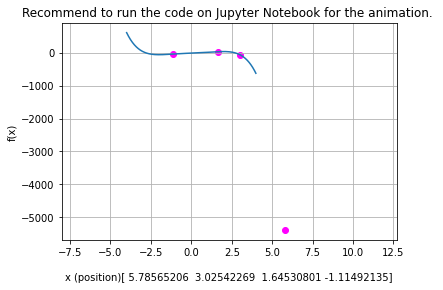

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
%matplotlib inline

fig = plt.figure()
# plt.ion()

for index in range(ITERATIONS):
    fig.clf()
    plt.title("Recommend to run the code on Jupyter Notebook for the animation. ")

    x = np.arange(-4, 4, 0.01)
    function = -(x**5)+5*(x**3)+20*x-5
    particles_location_x = History_Position[index*4:index*4+4]
    particles_location_y = f(History_Position[index*4:index*4+4])

    plt.scatter(particles_location_x,particles_location_y,c='magenta')

    # np.set_printoptions(precision=8)
    plt.xlabel(f"\nx (position){particles_location_x}")
    plt.ylabel("f(x)")

    LB = 2*min(History_Position[index*4:index*4+4])\
             -max(History_Position[index*4:index*4+4])
    UB = 2*max(History_Position[index*4:index*4+4])\
            -min(History_Position[index*4:index*4+4])

    plt.xlim(LB, UB)
    plt.plot(x, function)
    plt.grid()

    display.clear_output(wait=True)
    plt.pause(0.4)

# plt.ioff()

plt.show()
